# Final Project Submission

Student name: ALex Kaswii

Student pace: part time 


# **Customer Feedback Analysis for Improved Service Delivery**

# 1.Business Understanding

## Overview
In the competitive and customer-oriented markets of today, feedback is an important commodity
needed in formulating business strategies as well as improving service delivery. Customer reviews,
ratings, and comments highlight the trend of preference, pain points, and sentiment, thus helping the
business to frame its offerings to meet the expectations of the customers.
Efficiently analyzing large volumes of unstructured customer feedback is a challenge. The current
manual ways of doing these things are extremely cumbersome and prone to errors, while most existing
tools are lacking in comprehensive thematic analysis and tracking sentiment trends. This project will
help bridge this gap through the provision of an automated system for sentiment analysis, identification
of trends, and thematic discovery and present actionable insights in real-time.

**Target Audience**
The project serves:

- **Business Owners:** Benefit from increased sales, customer retention, and improved product offerings.
- **Customers:** Receive tailored product recommendations and an improved shopping experience.
- **Product Managers:** Gain insights into product performance and areas for improvement.
- **Marketing Teams:** Leverage customer sentiment insights to refine campaigns and messaging.
- **Development Teams:** Build and maintain the API-driven, scalable system for seamless integration.
- **Data Analysts:** Source raw feedback into actionable insights.

## Problem Statement
Businesses struggle to meet diverse customer expectations due to challenges in analyzing vast data from interactions and reviews. This hampers their ability to deliver personalized recommendations and understand customer sentiment, leading to missed opportunities for engagement, satisfaction, and loyalty in a competitive market.
Impact
The proposed system shall contribute by:
- Enhancing Customer Satisfaction: This will help address negative sentiments.
- Improve Decision Making: showing key themes and trends for strategy.
- Enhance Competitive Advantage: Improve customer loyalty and reduce churn.

## Objectives
**Main Objective:**

To design and implement a Sentiment Analysis System that classifies customer feedback into positive, neutral, and negative sentiments using advanced Natural Language Processing (NLP) techniques, ensuring an accurate understanding of customer sentiment.

**Specific Objectives**
1. **Provide Tailored Recommendations:** Utilize collaborative and content-based filtering techniques to suggest products that align with user preferences.
2. **Analyze Customer Sentiment:** Classify customer feedback into positive, neutral, or negative sentiments to identify satisfaction levels and areas of concern.
3. **Generate Actionable Insights:** Assist businesses in refining product offerings and improving services through sentiment-driven analysis.
4. **Enable Scalability:** Build a system capable of handling increasing data and user volumes while maintaining consistent performance.


## Success Metrics
The success of the project will be measured by use of the following:

1. **Sentiment Analysis Metrics:**
- Classification accuracy of at least 85%
- High precision, recall, and F1-scores to have a balanced measure.
  
2. **Thematic Analysis Metrics:**
- High coherence scores, making topics interpretable.
  
3. **Business Impact Metrics:**
- Shows through measurement, that customer satisfaction has increased or service ratings have
improved.
- Reduction in the time to respond to negative feedback trends.ts.





# 2.Data Understanding:
**Data Source**

The dataset in this project represents a mix of the following:

1. **Internal Repositories:** This includes customer feedback data sourced directly from within the company databases, such as post-purchase reviews of products and services, customer service, and survey responses.
2. **Public Repositories:** In fact, Public datasets using Yelp, Amazon product reviews, or available on
Kaggle are a few examples that contain a wide range of customer feedback about products and services.
The dataset includes both textual and numerical characteristics for efficient and effective extraction of
customer sentiment and themes.

**Data Features**
1. **Review Text**: contains unstructured customerfeedback.Used as a Key input for sentiment analysis and topic modeling.
2. **Ratings:** Quantification of customer satisfaction.Results from the classification of sentiments could be validated with it and deliver a fast overview of the level of satisfaction.
3. **Product/Service Category:** Labels indicating product or service associated with each review.This allows segmentation to specific analyses, thus enabling the identification of both sentiment and themes that concern a particular offering.

# 3.Data Preparation:



**3.1 Importing the necessary libraries**

In [166]:
# imbalanced-learn is a Python package designed to handle and work with imbalanced datasets
%pip install imbalanced-learn


Note: you may need to restart the kernel to use updated packages.


In [167]:
#import files
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,cross_val_score, GridSearchCV
from imblearn.over_sampling import SMOTE 
from scipy import stats as stats
from imblearn.pipeline import Pipeline as imbpipe
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score,\
roc_curve,roc_auc_score,classification_report, auc, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler, OneHotEncoder
# from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
from scipy import stats
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import nltk
from wordcloud import WordCloud
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
# import tensorflow as tf
# from tensorflow import keras
from scipy.sparse import csr_matrix
from sklearn.svm import SVC
from sklearn.exceptions import NotFittedError
from sklearn.naive_bayes import MultinomialNB
from sklearn.base import BaseEstimator, TransformerMixin
# from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
# from tensorflow import keras
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics.pairwise import cosine_similarity
#from surprise import SVD, Dataset, Reader
#from surprise.model_selection import train_test_split
from tabulate import tabulate

import warnings
warnings.filterwarnings('ignore')

**3.2 Load the Dataset**

In [168]:
#chardet is a Python library that detects the character encoding of text files
%pip install chardet


Note: you may need to restart the kernel to use updated packages.


The code below reads a CSV file named **combined_dta.csv** into a pandas DataFrame, handling encoding issues with **unicode_escape** and skipping rows with errors.

In [169]:
df = pd.read_csv("combined_dta.csv", encoding='unicode_escape', on_bad_lines='skip')


**3.3 Display the First Few Rows**

Lets view the first few rows.

In [170]:
# Display the first 5 rows of the DataFrame
print("first 5 rows of the DataFrame:")
print(df.head(5))

first 5 rows of the DataFrame:
  web-scraper-order                          web-scraper-start-url  \
0      1730407108-1  https://www.jumia.co.ke/computer-accessories/   
1      1730407112-2  https://www.jumia.co.ke/computer-accessories/   
2      1730407112-3  https://www.jumia.co.ke/computer-accessories/   
3      1730407114-4  https://www.jumia.co.ke/computer-accessories/   
4      1730407116-5  https://www.jumia.co.ke/computer-accessories/   

                                             product  \
0  Black Friday dealLaptop Skin Wrap Vinyl from 1...   
1  Black Friday deal9"-17" Laptop Cooling Stand P...   
2  Black Friday deal9"-17" Laptop Cooling Stand P...   
3  Black Friday dealLexar 2.5" SATA 256GB Laptop ...   
4      WD External Portable Hard Drive-2TBKSh 15,000   

                                        product-href  \
0  https://www.jumia.co.ke/generic-laptop-skin-wr...   
1  https://www.jumia.co.ke/9-17-laptop-cooling-st...   
2  https://www.jumia.co.ke/9-17-laptop-cool

We then check the features in our dataset by printing out the columns in our dataset.

>This code identifies and removes unnecessary "Unnamed" columns in the DataFrame, cleaning it up for further analysis.

In [171]:
# Check available columns
print("Available columns in the DataFrame:")
unnamed_columns = [col for col in df.columns if 'Unnamed' in col]

# Drop the unnamed columns
df = df.drop(columns=unnamed_columns)

print(f"Dropped {len(unnamed_columns)} unnamed columns.")

print(df.columns.tolist())

Available columns in the DataFrame:
Dropped 0 unnamed columns.
['web-scraper-order', 'web-scraper-start-url', 'product', 'product-href', 'product_name', 'image', 'price', 'brand', 'link', 'link-href', 'see_all', 'see_all-href', 'review_title', 'review', 'ratings', 'user_name', 'date', 'see_all_link', 'see_all_link-href', 'Category']



The dataset contains a total of 33 columns, with 20 meaningful columns, including product details such as name, price, brand, and image, along with metadata from the web scraping process like scraping order and start URL. It also includes review information like review titles, content, ratings, user names, and dates, providing insights into customer sentiment. 
 
 This structured data is useful for product analysis, sentiment evaluation, and exploring trends across categories.
 

In [172]:
# Summary statistics for numerical features
print("\nSummary statistics:")
print(df.describe())


Summary statistics:
         web-scraper-order                   web-scraper-start-url  \
count                60464                                   60464   
unique               60150                                     248   
top     ?web-scraper-order  https://www.jumia.co.ke/mobile-phones/   
freq                    51                                    1448   

                                                  product  \
count                                               60464   
unique                                              25445   
top     Black Friday dealOut of StockOfficial StoreHis...   
freq                                                  192   

                                             product-href  \
count                                               60464   
unique                                              26684   
top     https://www.jumia.co.ke/hisense-ax-3100g-3.1ch...   
freq                                                  192   

                

Check the datatypes of the features in our dataset. Checking data types helps ensure that the data is structured correctly for analysis, optimizes performance, and prevents errors in data processing or modeling.

In [173]:
# to display the data types of each column in the DataFrame
print("\nData types of each column:")
print(df.dtypes)

# Convert data types if needed
# Example: Convert a column to categorical
# df['category_column'] = df['category_column'].astype('category')  # Replace with your actual column name

# Parse Rating to a new dataframe column parsed_ratings means to extract or transform the rating information from an 
# existing column in the dataframe and store it in a new column called parsed_ratings.
# Assuming 'ratings' column contains ratings as strings with some unwanted characters
#df['parsed_ratings'] = df['ratings'].str.extract(r'(\d+\.\d+|\d+)').astype(float)



Data types of each column:
web-scraper-order        object
web-scraper-start-url    object
product                  object
product-href             object
product_name             object
image                    object
price                    object
brand                    object
link                     object
link-href                object
see_all                  object
see_all-href             object
review_title             object
review                   object
ratings                  object
user_name                object
date                     object
see_all_link             object
see_all_link-href        object
Category                 object
dtype: object


# 4.Data Cleaning



**4.1 Identifying and handling any missing values in our dataset.** 

In the cell below, we use the missingno module to analyze the distribution of missing values in the dataframe.
The provided plot is consistent with the data in the dataset

We also indicate the number of missing values in each column


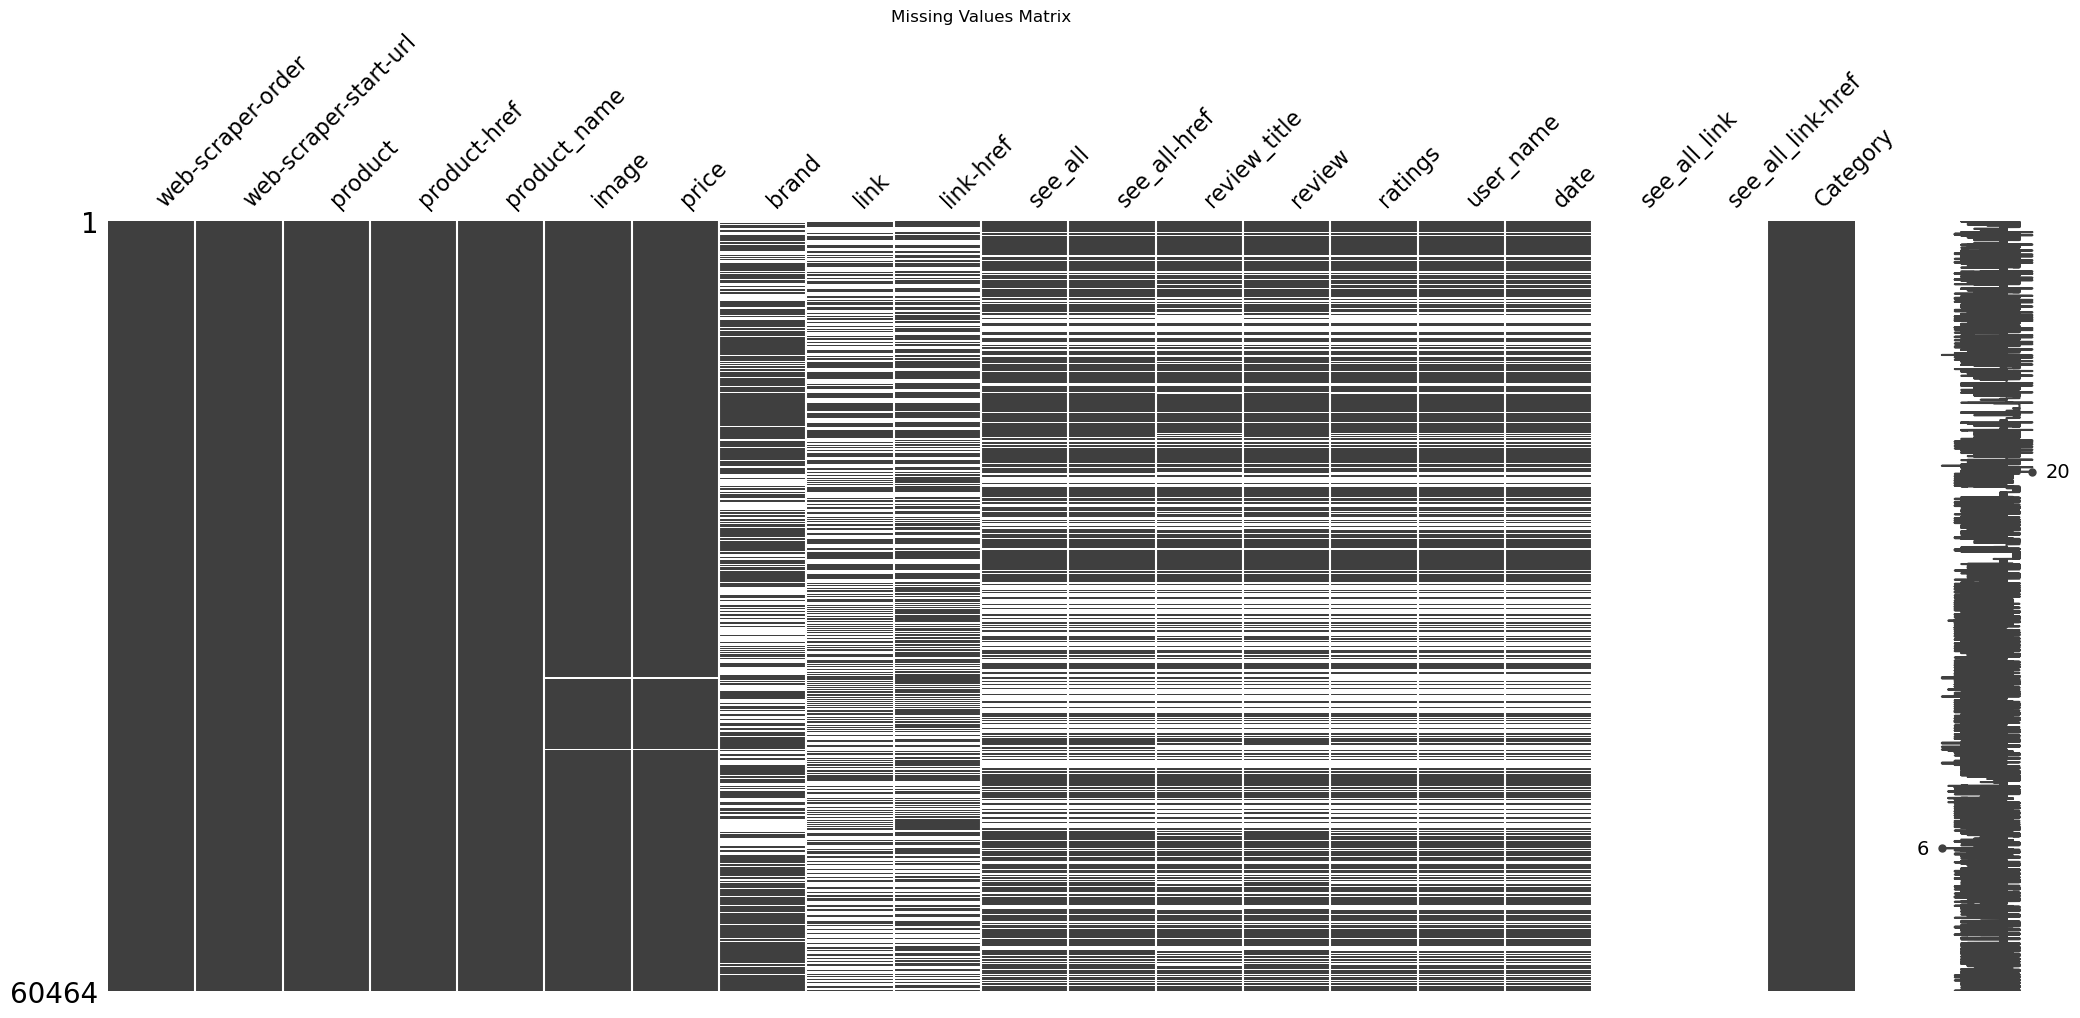


Missing values in each column (sorted by highest):
see_all_link-href        60413
see_all_link             60413
link                     32325
link-href                24444
user_name                22846
date                     22846
ratings                  22846
review_title             22759
brand                    20880
review                   20263
see_all-href             20039
see_all                  20033
image                      134
price                      134
product_name                 5
web-scraper-order            0
web-scraper-start-url        0
product-href                 0
product                      0
Category                     0
dtype: int64


In [174]:
import missingno as msno

# Visualize missing values
msno.matrix(df)
plt.title("Missing Values Matrix")
plt.show()

# Check for missing values
print("\nMissing values in each column (sorted by highest):")
print(df.isnull().sum().sort_values(ascending=False))


**Interpretation:**

>The dataset has a significant amount of missing data across many features.
This missing data could potentially impact the analysis and modeling if not handled appropriately.
Strategies for handling missing data might include imputation, removal of features with too much missing data, or using modeling techniques that can handle missing data.


The function below identifies which columns in your dataset have missing values and how significant the missing data is in terms of percentage.
It helps in cleaning and preprocessing the data.


In [175]:
# Function to calculate the percentage of null values in every column
def null_percentages(df):
    # Calculate the number of missing values and their percentage
    null_values = df.isnull().sum()
    null_percentage = (null_values / df.shape[0]) * 100
    
    # Create a DataFrame with the results
    missing_data = pd.DataFrame({'Null Values': null_values, 'Percentage': null_percentage})

    # Filter out columns with no missing values and sort by 'Missing Values'
    missing_data = missing_data[missing_data['Null Values'] > 0].sort_values(by='Null Values', ascending=False)

    return missing_data

# Call the correct function
null_percentages(df)


,Null Values,Percentage
see_all_link,60413,99.915652
see_all_link-href,60413,99.915652
link,32325,53.461564
link-href,24444,40.427362
ratings,22846,37.784467
user_name,22846,37.784467
date,22846,37.784467
review_title,22759,37.640580
brand,20880,34.532945
review,20263,33.512503



The **key observations** from the missing data analysis show that columns such as *see_all_link* (99.91% missing) and *see_all_link-href* (99.80% missing) have extremely high percentages of missing values, suggesting they may be candidates for removal. Columns like *link* (61.34% missing), *ratings* (48.46% missing), and *user_name* (48.41% missing) have moderate levels of missing data, and may need imputation or careful handling. On the other hand, columns with very low missing data, like *product* (0.001%) and *image* (0.33%), have minimal missing values and likely need less attention, with imputation or exclusion being easy options.


In [176]:
#used for handling missing data by replacing missing values with a specific strategy 
from sklearn.impute import SimpleImputer


In [177]:
# Separate categorical and numerical columns
categorical_cols = df.select_dtypes(include=['object']).columns
numerical_cols = df.select_dtypes(exclude=['object']).columns

# Impute categorical columns with Mode (most frequent value)
if len(categorical_cols) > 0:
    mode_imputer = SimpleImputer(strategy="most_frequent")
    df[categorical_cols] = mode_imputer.fit_transform(df[categorical_cols])

# Impute numerical columns with Mode (most frequent value)
if len(numerical_cols) > 0:
    mode_imputer = SimpleImputer(strategy="most_frequent")
    df[numerical_cols] = mode_imputer.fit_transform(df[numerical_cols])

# Confirm that all missing values are handled
print("Missing values after imputation:")
print(df.isnull().sum().sum())  # Should be 0 if all missing values were replaced

# View the imputed DataFrame
print(df.head())


Missing values after imputation:
0
  web-scraper-order                          web-scraper-start-url  \
0      1730407108-1  https://www.jumia.co.ke/computer-accessories/   
1      1730407112-2  https://www.jumia.co.ke/computer-accessories/   
2      1730407112-3  https://www.jumia.co.ke/computer-accessories/   
3      1730407114-4  https://www.jumia.co.ke/computer-accessories/   
4      1730407116-5  https://www.jumia.co.ke/computer-accessories/   

                                             product  \
0  Black Friday dealLaptop Skin Wrap Vinyl from 1...   
1  Black Friday deal9"-17" Laptop Cooling Stand P...   
2  Black Friday deal9"-17" Laptop Cooling Stand P...   
3  Black Friday dealLexar 2.5" SATA 256GB Laptop ...   
4      WD External Portable Hard Drive-2TBKSh 15,000   

                                        product-href  \
0  https://www.jumia.co.ke/generic-laptop-skin-wr...   
1  https://www.jumia.co.ke/9-17-laptop-cooling-st...   
2  https://www.jumia.co.ke/9-17-laptop-


The code above first separates columns into categorical and numerical types.
It then imputes missing values in both categorical and numerical columns using the Mode value.
After imputation, it confirms that no missing values remain and displays the first few rows of the updated DataFrame.


**4.2 Check for duplicates.**

After handling the missing values appropriately we go ahead to check the shape and thefeatures that are remaining in our dataset. We then check for presence of duplicates in our data.

In [178]:
df.columns

Index(['web-scraper-order', 'web-scraper-start-url', 'product', 'product-href',
       'product_name', 'image', 'price', 'brand', 'link', 'link-href',
       'see_all', 'see_all-href', 'review_title', 'review', 'ratings',
       'user_name', 'date', 'see_all_link', 'see_all_link-href', 'Category'],
      dtype='object')

In [179]:
df.shape

# Checks for row duplicates
df.duplicated().sum()

# Drop duplicate rows
df = df.drop_duplicates()

# Confirm that duplicates are removed by checking the number of rows
print("Number of rows after dropping duplicates:", df.shape[0])

Number of rows after dropping duplicates: 60411


The number of rows and columns....

**4.3 Drop unnecessary columns**

In [180]:
#Select the columns of interest: 
#ratings, sub_category, overall_ratings, date, month and ratings_count
# Step 1: Convert the 'ratings' column to string
df['ratings'] = df['ratings'].astype(str)

# Step 2: Extract numeric part from 'ratings' using regex
df['ratings'] = df['ratings'].str.extract(r'(\d+)').astype(float)

# Step 3: Extract sub_category from the URL (web-scraper-start-url)
df['sub_category'] = df['web-scraper-start-url'].str.extract(r'\.ke/([^/]+)/')

# Step 4: Extract overall_ratings from the 'product' column
df['overall_ratings'] = df['product'].str.extract(r'(\d+\.\d+|\d+)\s*out of 5')[0].astype(float)

# Step 5: Correct ratings above 5.0 (if any), by splitting and reassembling
df['overall_ratings'] = df['overall_ratings'].apply(lambda x: float(str(x).split('.')[0][-1] + '.' + str(x).split('.')[-1]) if x > 5.0 else x)

# Step 6: Extract ratings_count from the 'product' column (reviews count)
df['ratings_count'] = df['product'].str.extract(r'(\d+) out of 5\((\d+)\)')[1].astype(float)

df['review'] = df['review'].astype(str)

df['review_title'] = df['review_title'].astype(str)


**Summary of Transformations:**
- **ratings**: Extracts the numeric rating from a string.
- **sub_category**: Extracts the sub-category from the URL.
- **overall_ratings**: Extracts the rating out of 5 from the product column and corrects ratings above 5.0.
- **ratings_count**: Extracts the number of reviews from the product column.
- **review and review_title**: Converts these columns to string format.
  
This processing standardizes and cleans the data for further analysis or modeling.

In [181]:
# Drop rows with missing values
df = df.dropna(subset=['ratings', 'sub_category', 'overall_ratings', 'ratings_count'])

# Or, you can impute missing values (e.g., for numerical columns)
df['ratings'].fillna(df['ratings'].mean(), inplace=True)
df['overall_ratings'].fillna(df['overall_ratings'].mean(), inplace=True)
df['ratings_count'].fillna(df['ratings_count'].mean(), inplace=True)
df['sub_category'].fillna('Unknown', inplace=True)  # For categorical data
df['review'].fillna('Unreviewed', inplace=True)  # For categorical data
df['review_title'].fillna('Unreviewed', inplace=True)  # For categorical data

df.shape


(39726, 23)

In [182]:
# Convert 'ratings' into categorical bins (e.g., Low, Medium, High)
df['ratings_category'] = pd.cut(df['ratings'], bins=[0, 2, 4, 5], labels=['Low', 'Medium', 'High'])

# Convert 'overall_ratings' into categorical bins as well
df['overall_ratings_category'] = pd.cut(df['overall_ratings'], bins=[0, 2, 4, 5], labels=['Low', 'Medium', 'High'])

print(df)


      web-scraper-order                             web-scraper-start-url  \
1          1730407112-2     https://www.jumia.co.ke/computer-accessories/   
2          1730407112-3     https://www.jumia.co.ke/computer-accessories/   
29        1730407173-30     https://www.jumia.co.ke/computer-accessories/   
30        1730407177-31     https://www.jumia.co.ke/computer-accessories/   
37        1730407197-38     https://www.jumia.co.ke/computer-accessories/   
...                 ...                                               ...   
60452    1730674160-105  https://www.jumia.co.ke/aromatherapy-fragrances/   
60454    1730674183-107  https://www.jumia.co.ke/aromatherapy-fragrances/   
60460    1730674213-113  https://www.jumia.co.ke/aromatherapy-fragrances/   
60462    1730674248-115  https://www.jumia.co.ke/aromatherapy-fragrances/   
60463    1730674248-116  https://www.jumia.co.ke/aromatherapy-fragrances/   

                                                 product  \
1      Black Fr

In [183]:
import re

# Function to clean currency values
def new_currency(price):
    # Remove non-numeric characters (currency symbols)
    cleaned_price = re.sub(r"[^\d.-]", "", str(price))
    
    # Handle ranges (e.g., "500-600")
    if '-' in cleaned_price:
        try:
            low, high = map(float, cleaned_price.split('-'))
            return (low + high) / 2  # Return the average of the range
        except ValueError:
            return None  # Return None if conversion fails
    else:
        try:
            return float(cleaned_price)  # Convert a single price to float
        except ValueError:
            return None  # Return None if conversion fails

# Apply the conversion function to the 'price' column
df['price'] = df['price'].apply(new_currency)

# Check for any missing values after transformation
print("Missing values in 'price' column after cleaning:", df['price'].isnull().sum())

# Optionally, you can drop rows with missing 'price' values if needed:
df = df.dropna(subset=['price'])

df.shape

Missing values in 'price' column after cleaning: 0


(39726, 25)

# 5.Exlanatory Data Analysis

**5.1 Univariate Data analysis**

The code below calculates the sentiment of reviews grouped by product subcategory and provides statistics such as the average sentiment score, the number of reviews, and the percentage of positive reviews for each subcategory. It also identifies the top 20 subcategories with the most positive sentiment and the bottom 20 with the most negative sentiment.



In [184]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk

# Download required NLTK data
nltk.download('vader_lexicon')

# Combine review and review_title for analysis
df['combined_text'] = df['review'] + ' ' + df['review_title']

# Initialize sentiment analyzer
sia = SentimentIntensityAnalyzer()

# Calculate sentiment scores
df['sentiment_score'] = df['combined_text'].apply(lambda x: sia.polarity_scores(x)['compound'])

def analyze_subcategory(subcat):
    sub_df = df[df['sub_category'] == subcat]
    
    # Calculate average sentiment score
    avg_sentiment = sub_df['sentiment_score'].mean()

    avg_price = sub_df['price'].mean()

    avg_rating = sub_df['ratings'].mean()
    
    # Count of reviews
    num_reviews = len(sub_df)
    
    # Percentage of positive reviews
    pos_reviews = (sub_df['sentiment_score'] > 0).sum() / num_reviews * 100

    sentiment_score=sub_df['combined_text'].apply(lambda x: sia.polarity_scores(x)['compound']).mean()
    
    return {
        'sub_category': subcat,
        'avg_sentiment': avg_sentiment,
        'num_reviews': num_reviews,
        'pos_reviews_percent': pos_reviews,
        'price':avg_price,
        'sentiment_score':sentiment_score,
        'avg_rating':avg_rating
        
    }

stats = [analyze_subcategory(subcat) for subcat in df['sub_category'].unique()]
stats_df = pd.DataFrame(stats)

# Sort by average sentiment score
sorted_stats_df = stats_df.sort_values(by='avg_sentiment')

# Top 20 highest sentiment scores
top_20_high = sorted_stats_df.nlargest(20, 'avg_sentiment')

# Bottom 20 lowest sentiment scores
bottom_20_low = sorted_stats_df.nsmallest(20, 'avg_sentiment')


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Administrator\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


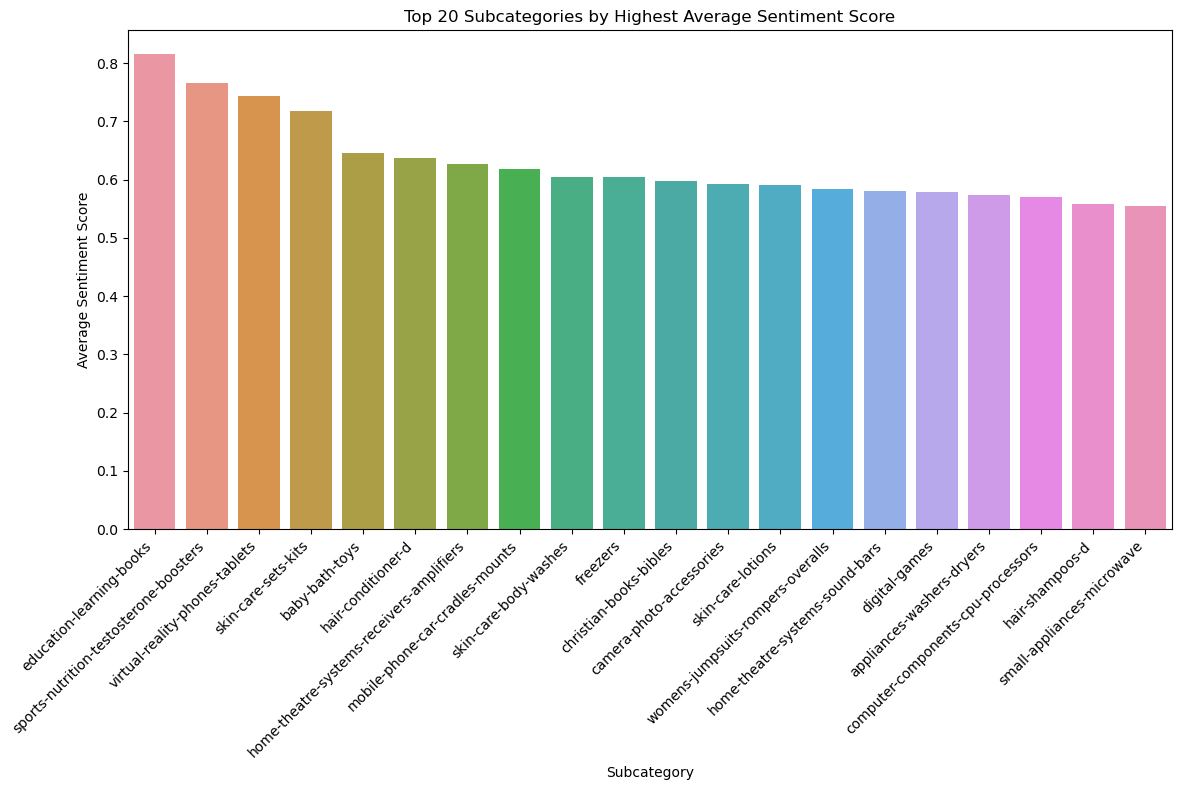

In [185]:

# Plot top 10 high sentiment scores
plt.figure(figsize=(12, 8))
sns.barplot(data=top_20_high, x='sub_category', y='avg_sentiment')
plt.title('Top 20 Subcategories by Highest Average Sentiment Score')
plt.xlabel('Subcategory')
plt.ylabel('Average Sentiment Score')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

The plot shows the top 20 subcategories with the highest sentiment scores, making it easy to visually identify which subcategories have the most positive reviews. As observed the subcategory with highest sentiment score is education-learning-books.

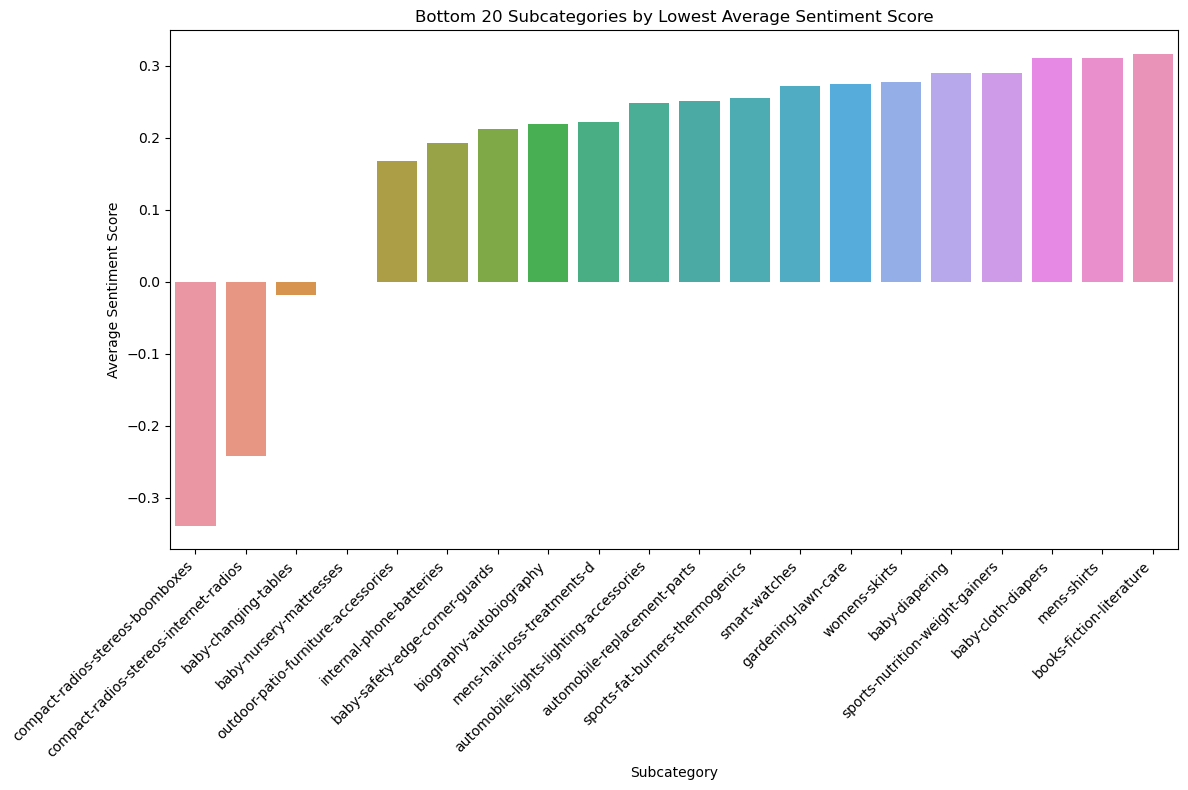

In [186]:
# Plot bottom 10 low sentiment scores
plt.figure(figsize=(12, 8))
sns.barplot(data=bottom_20_low, x='sub_category', y='avg_sentiment')
plt.title('Bottom 20 Subcategories by Lowest Average Sentiment Score')
plt.xlabel('Subcategory')
plt.ylabel('Average Sentiment Score')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()



Displays the bottom 20 subcategories with the lowest average sentiment scores. The x-axis represents the subcategories, and the y-axis represents their average sentiment score. This helps in visually identifying which subcategories have the most negative reviews which in this case is compact-radios-stereos-boomboxes.

In [187]:
def sentiment(rating):
    if rating >= 4:
        return 'Positive'
    elif rating == 3:
        return 'Neutral'
    else:
        return 'Negative'
# Apply the sentiment function to the 'ratings' column
df['sentiment'] = df['overall_ratings'].apply(sentiment)

category_sentiment = df.groupby('sub_category')['sentiment'].value_counts(normalize=True).unstack()

# Calculate sentiment distribution for top 20 high subcategories
top_20_high_sentiment = category_sentiment.loc[top_20_high['sub_category'].head(20)]

# Calculate sentiment distribution for bottom 20 low subcategories
bottom_20_low_sentiment = category_sentiment.loc[bottom_20_low['sub_category'].head(20)]




In [188]:
print("\nTop 20 High Subcategory Sentiment Distribution:")
print(top_20_high_sentiment)




Top 20 High Subcategory Sentiment Distribution:
sentiment                                  Negative   Neutral  Positive
sub_category                                                           
education-learning-books                   0.111111  0.222222  0.666667
sports-nutrition-testosterone-boosters     0.500000       NaN  0.500000
virtual-reality-phones-tablets                  NaN       NaN  1.000000
skin-care-sets-kits                             NaN       NaN  1.000000
baby-bath-toys                                  NaN       NaN  1.000000
hair-conditioner-d                              NaN  0.006329  0.993671
home-theatre-systems-receivers-amplifiers  0.051282  0.051282  0.897436
mobile-phone-car-cradles-mounts                 NaN       NaN  1.000000
skin-care-body-washes                      0.066986  0.004785  0.928230
freezers                                        NaN       NaN  1.000000
christian-books-bibles                     0.057143  0.028571  0.914286
camera-photo-ac


Bottom 20 Low Subcategory Sentiment Distribution:


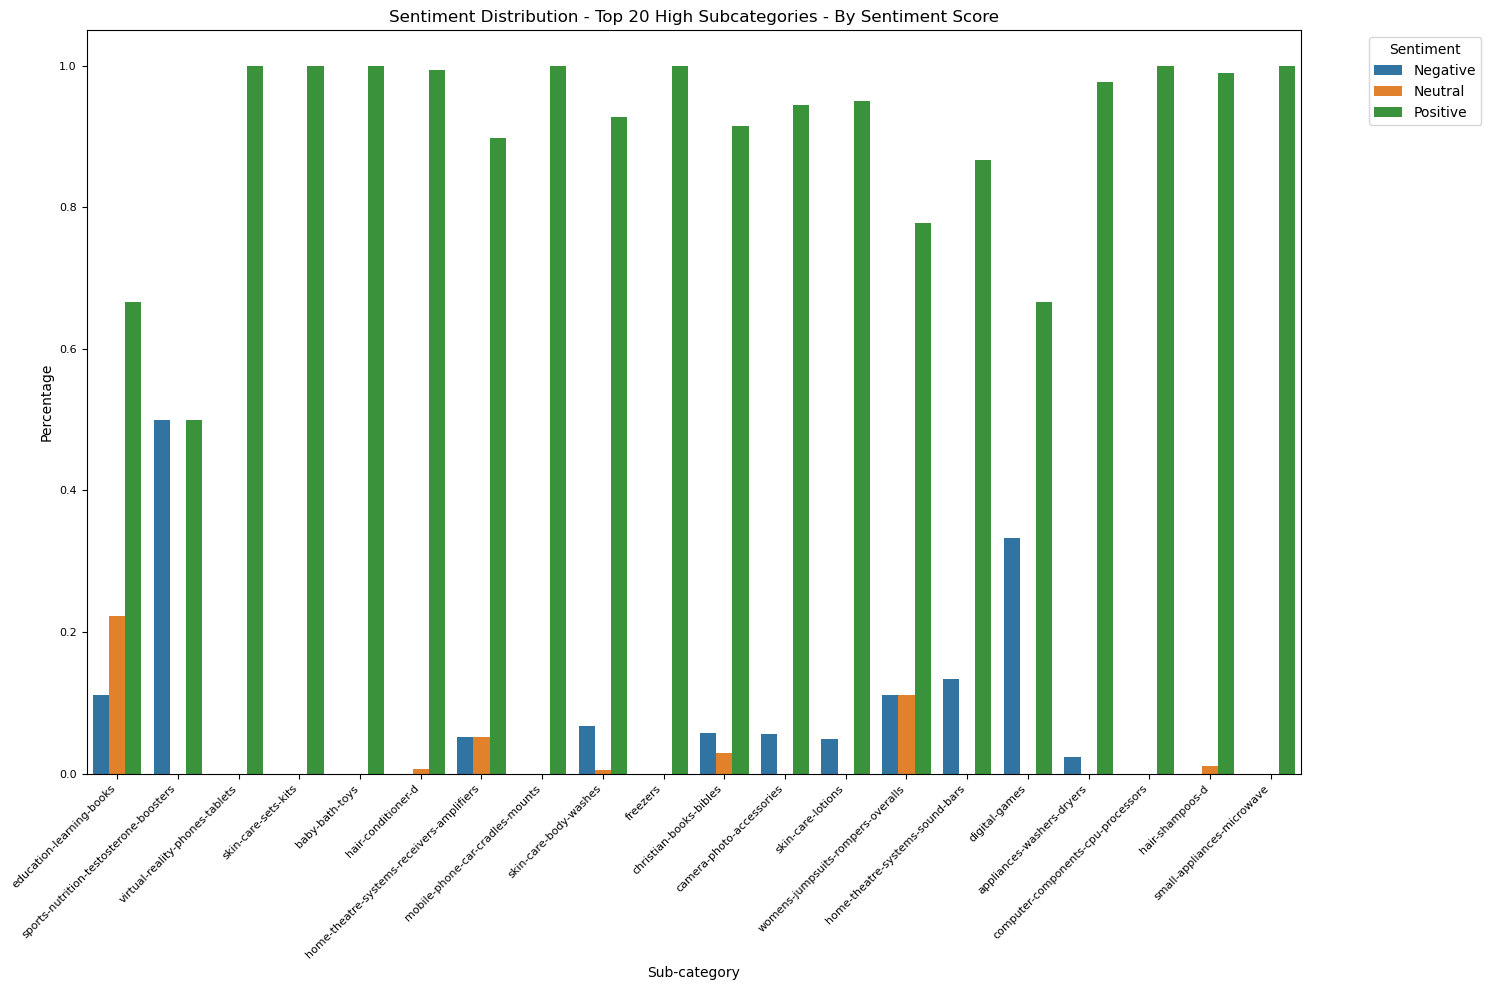

In [189]:
print("\nBottom 20 Low Subcategory Sentiment Distribution:")
def reshape_data(df):
    return pd.melt(df.reset_index(), id_vars=['sub_category'], var_name='sentiment', value_name='percentage')

# Reshape the data
top_reshaped = reshape_data(top_20_high_sentiment)
bottom_reshaped = reshape_data(bottom_20_low_sentiment)

plt.figure(figsize=(15, 10))
sns.barplot(data=top_reshaped, x='sub_category', y='percentage', hue='sentiment')
plt.title('Sentiment Distribution - Top 20 High Subcategories - By Sentiment Score')
plt.xlabel('Sub-category')
plt.ylabel('Percentage')
plt.xticks(rotation=45, ha='right', fontsize=8)
plt.yticks(rotation=0, ha='right', fontsize=8)
plt.legend(title='Sentiment', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

**Interpretation of the Results:**

- **Sentiment Distribution:** The bars represent the percentage distribution of positive, negative, and neutral sentiments within each subcategory.
- **Top 20 High Subcategories:** The graph highlights the top 20 subcategories with the highest number of reviews.

 
This information can be used for
- Product Improvement: Focusing on subcategories with negative sentiment to identify areas for improvement.
- Marketing and Sales: Highlighting subcategories with positive sentiment to attract potential customers.
- Customer Support: Prioritizing subcategories with a high proportion of negative or neutral reviews for targeted support.

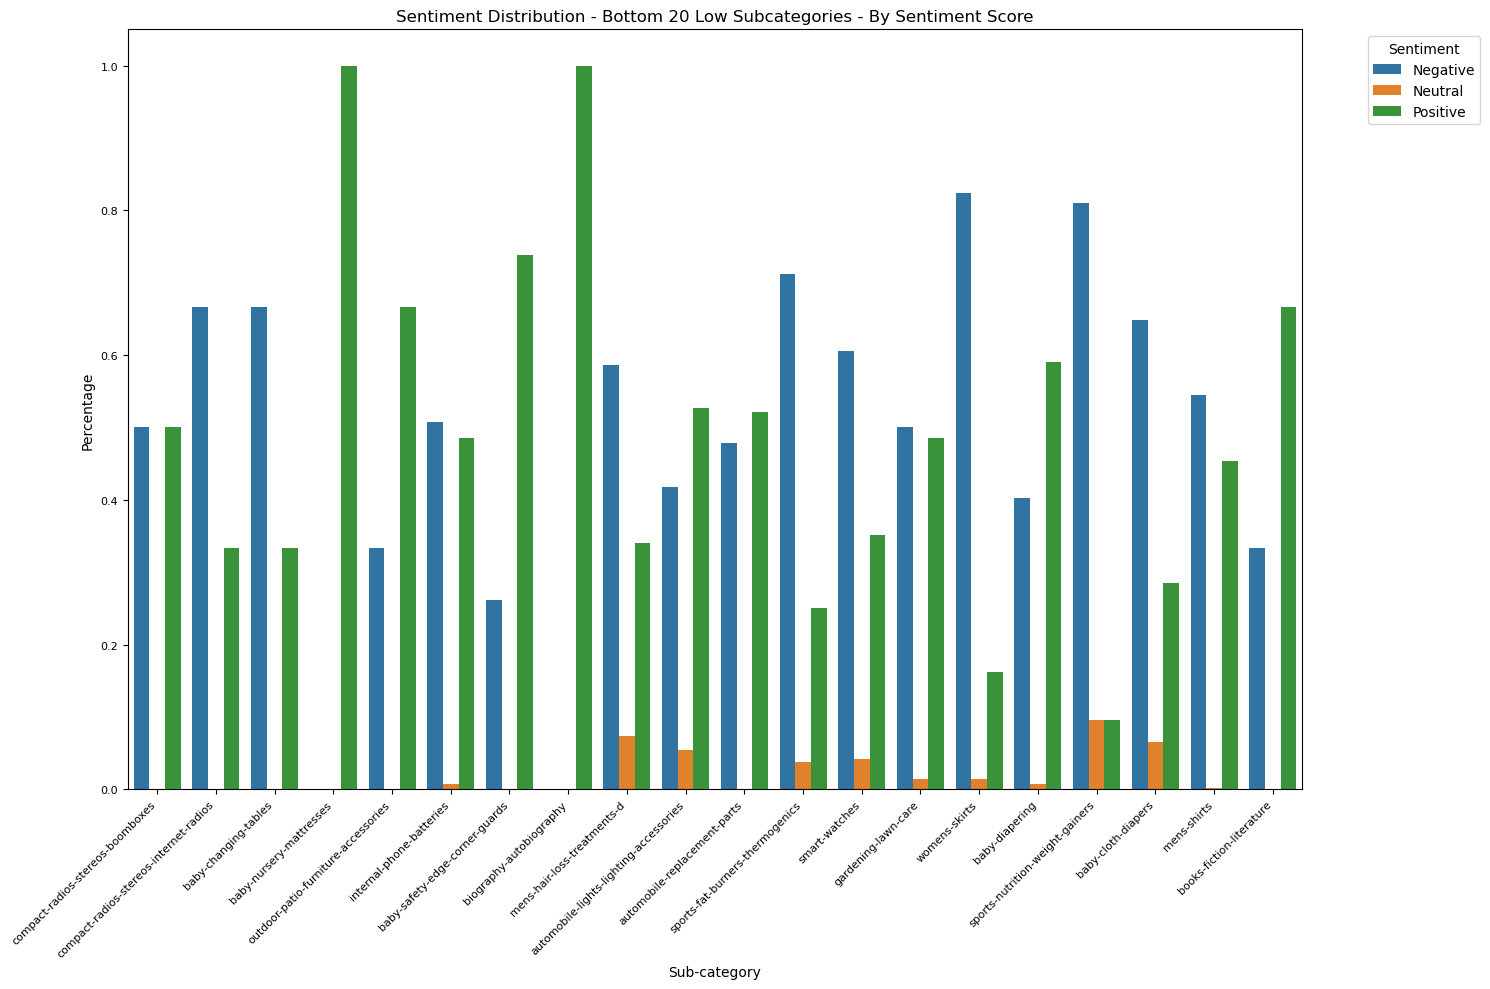

In [190]:
plt.figure(figsize=(15, 10))
sns.barplot(data=bottom_reshaped, x='sub_category', y='percentage', hue='sentiment')
plt.title('Sentiment Distribution - Bottom 20 Low Subcategories - By Sentiment Score')
plt.xlabel('Sub-category')
plt.ylabel('Percentage')
plt.xticks(rotation=45, ha='right', fontsize=8)
plt.yticks(rotation=0, ha='right', fontsize=8)
plt.legend(title='Sentiment', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

Given the image focuses on the bottom 20 subcategories with the lowest sentiment scores, we can draw the following conclusions:

1. Product or Service Issues in Specific Areas:

- Subcategories with high negative sentiment likely indicate areas where customers are experiencing significant problems or dissatisfaction.
- Subcategories with a mix of negative and neutral sentiment might point to inconsistent experiences. This could be due to factors like batch variations, supplier differences, or varying customer expectations.

2. Potential Customer Service Challenges:

- Low sentiment scores might also reflect issues with customer service. If customers are facing difficulties with returns, refunds, or general support, it could lead to negative reviews.

3. Opportunities for Improvement:

- Identifying the bottom-performing subcategories allows businesses to focus their efforts on addressing specific issues. By analyzing customer reviews and feedback, companies can pinpoint root causes and implement corrective actions.
- Targeted marketing campaigns can be used to rebuild trust and reputation in these subcategories. Offering discounts, promotions, or loyalty programs can help incentivize future purchases.

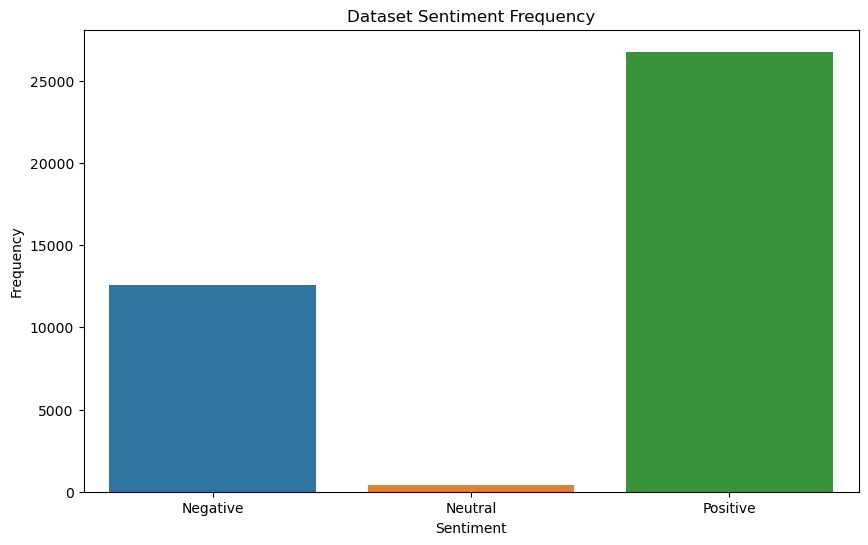

sentiment                               Negative   Neutral  Positive
sub_category                                                        
appliances-fridges-freezers             0.105085       NaN  0.894915
appliances-washers-dryers               0.022936       NaN  0.977064
aromatherapy-fragrances                 0.307692  0.038462  0.653846
audio-video-accessories                 0.294045  0.001241  0.704715
automobile-lights-lighting-accessories  0.418182  0.054545  0.527273
...                                          ...       ...       ...
womens-sandals-slippers                 0.397959  0.020408  0.581633
womens-shorts                           0.434783  0.043478  0.521739
womens-skirts                           0.823529  0.014706  0.161765
womens-suiting-blazers                  0.500000       NaN  0.500000
womens-tops-tees                        0.185897       NaN  0.814103

[204 rows x 3 columns]


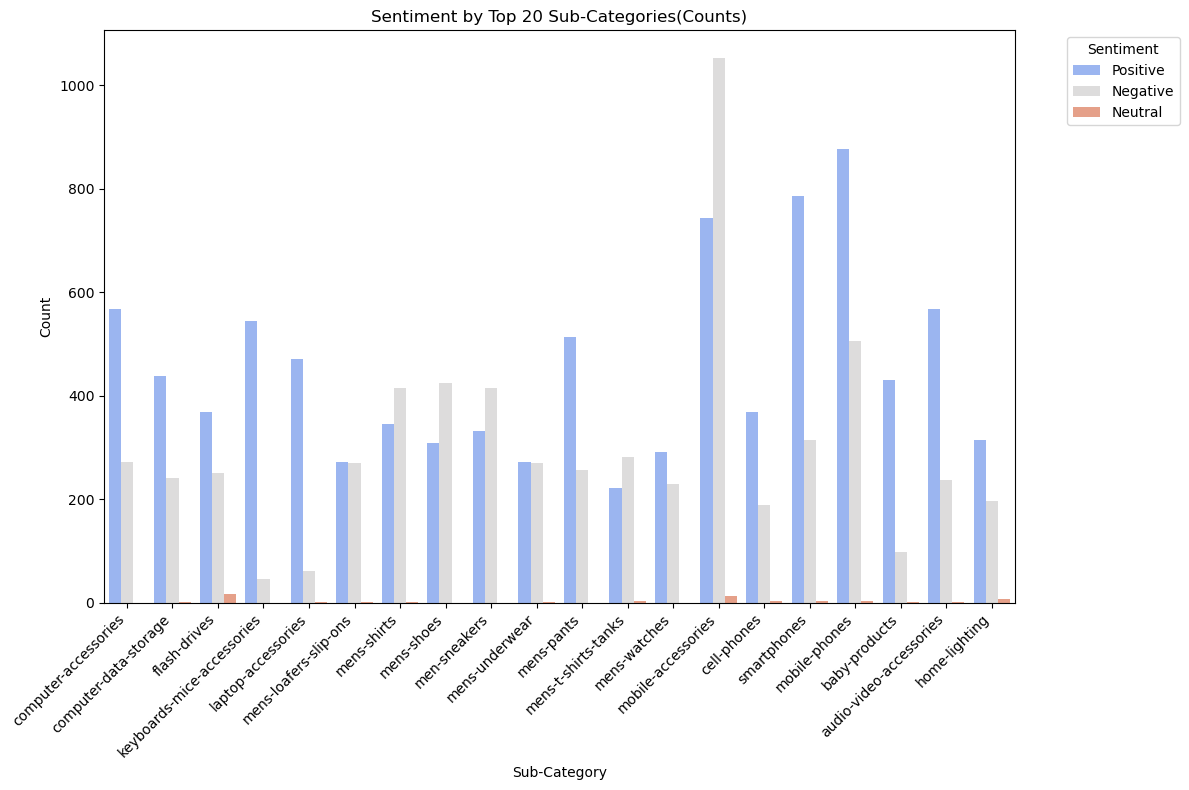

In [191]:
# Box plot for ratings by sentiment
plt.figure(figsize=(10, 6))


sns.countplot(data=df,x='sentiment',order=['Negative','Neutral','Positive'])
plt.title('Dataset Sentiment Frequency')
plt.xlabel('Sentiment')
plt.ylabel('Frequency')
plt.show()


df['sub_category'] = df['sub_category'].astype(str)
df['sentiment'] = df['sentiment'].astype(str)

category_sentiment = df.groupby('sub_category')['sentiment'].value_counts(normalize=True).unstack()
print(category_sentiment)

# Get top 20 sub-categories by count
top20SubCategories = df['sub_category'].value_counts().head(20)

# Filter dataframe to include only top 20 subcategories
df_filtered = df[df['sub_category'].isin(top20SubCategories.index)]

# Group the data by subcategory and sentiment, then count occurrences
sentiment_counts = df_filtered.groupby(['sub_category', 'sentiment']).size().unstack(fill_value=0)

# Create the plot
plt.figure(figsize=(12, 8))
sns.countplot(data=df_filtered, x='sub_category', hue='sentiment', palette='coolwarm', dodge=True)

plt.title('Sentiment by Top 20 Sub-Categories(Counts)')
plt.xlabel('Sub-Category')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Sentiment', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

The first bar chart clearly shows a strong positive bias in the overall sentiment. The majority of reviews are positive, with a smaller portion being neutral and an even smaller portion being negative. This suggests that overall, customers are generally satisfied with the products or services.

The second bar chart, focusing on the top 20 subcategories:
- **Positive Sentiment Dominates:** While there are some subcategories with a higher proportion of negative or neutral reviews, the overall trend remains positive. This indicates that customer satisfaction is generally high across most subcategories.
- **Variation Across Subcategories:** We can see that sentiment varies significantly between subcategories. Some subcategories, like "smart-phones" and "headphones", appear to have a higher percentage of positive reviews, while others might have a more balanced distribution.

>Potential Problem Areas: Subcategories with a higher proportion of negative or neutral reviews, such as "home-improvement-tools" or "computer-accessories-mice-keyboards", might indicate areas where product quality, customer service, or other factors need improvement.
>
**Conclusions and Recommendations:**
- Overall Positive Sentiment: The company should continue focusing on strategies that maintain high customer satisfaction levels.
- Identify Problem Areas: A deeper dive into the subcategories with lower sentiment scores is necessary to understand the specific reasons behind negative feedback. This could involve analyzing customer reviews, conducting surveys, or improving product quality and customer service.
- Leverage Positive Sentiment: The company can use the positive sentiment to its advantage by highlighting positive reviews in marketing materials and social media.
- Continuous Improvement: Regular monitoring of sentiment across subcategories is crucial to identify emerging trends and potential issues. This proactive approach can help prevent negative sentiment from escalating.
  
By addressing the specific needs of each subcategory and implementing targeted improvements, the company can further enhance customer satisfaction and strengthen its brand reputation.

**5.2 Bivariate analysis**

We analyze and visualize data in a DataFrame called top_20_high. The goal is to categorize products based on price, calculate a "value for money" metric, and visualize the sentiment scores for different product subcategories. 

In [192]:
top_20_high.columns



Index(['sub_category', 'avg_sentiment', 'num_reviews', 'pos_reviews_percent',
       'price', 'sentiment_score', 'avg_rating'],
      dtype='object')

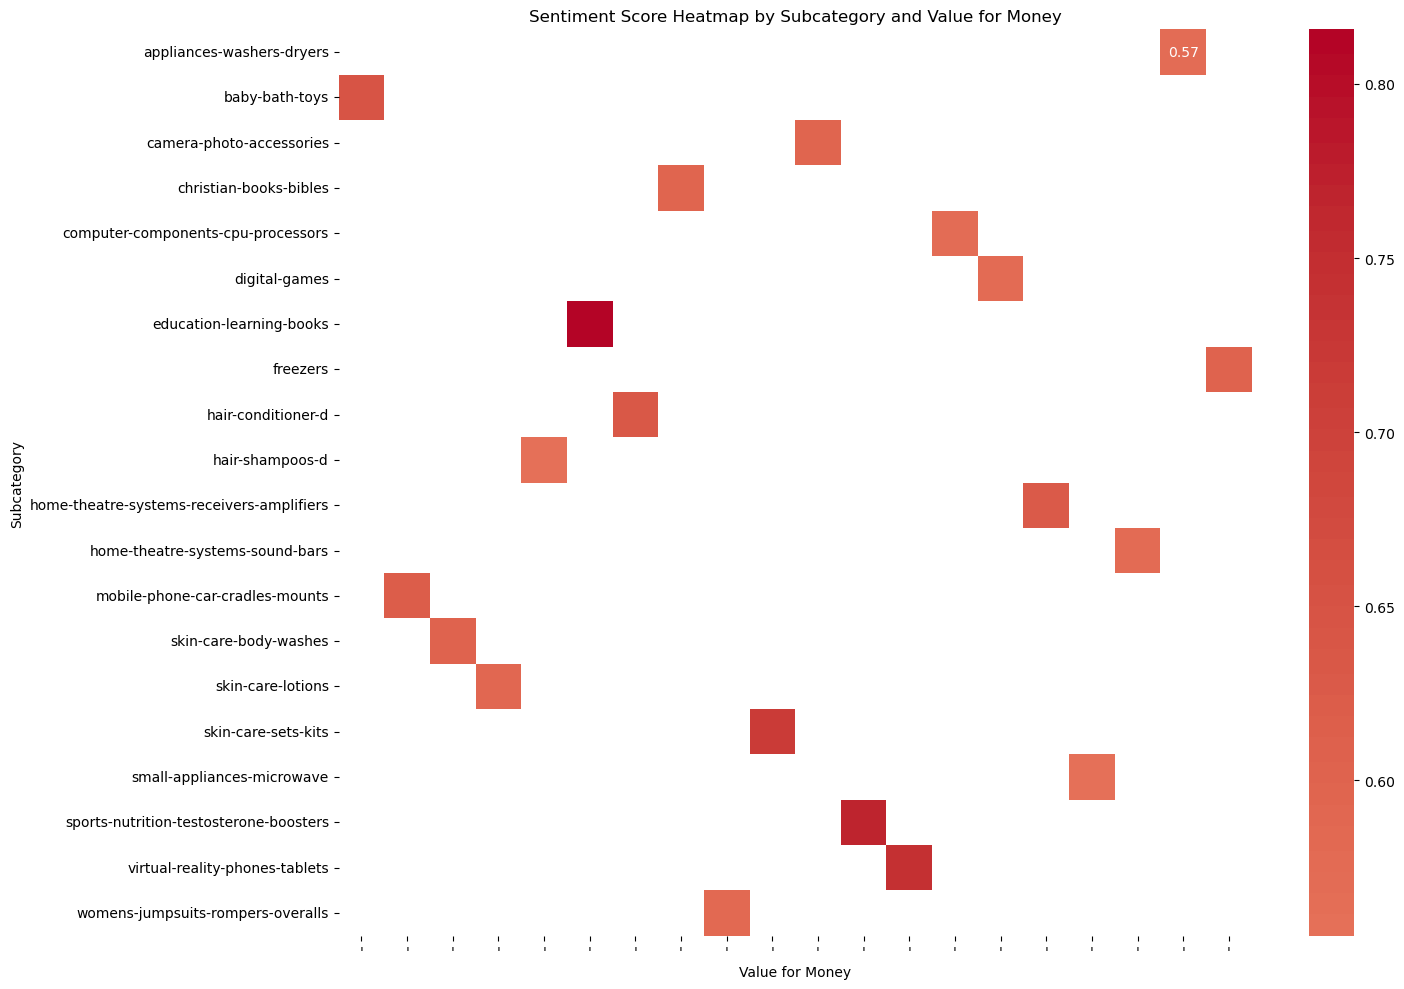

In [193]:
# Define price ranges
price_bins = [0, 3001, 5001, float('inf')]
price_labels = ['Low', 'Medium', 'High']

# Create price range column
top_20_high['price_range'] = pd.cut(top_20_high['price'], 
                           bins=price_bins,
                           labels=price_labels,
                           include_lowest=True)

# Create a "Value for Money" metric
top_20_high['value_for_money'] = top_20_high.apply(lambda row: row['sentiment_score'] * (row['price'] / 10000), axis=1)

# Create bins for value_for_money
value_bins = pd.cut(top_20_high['value_for_money'], 
                    bins=[top_20_high['value_for_money'].quantile(0.25), top_20_high['value_for_money'].quantile(0.75)],
                    include_lowest=True)

# Pivot table for heatmap
pivot_table = top_20_high.pivot_table(index='sub_category', columns=['price_range', 'value_for_money'], values='sentiment_score', aggfunc='mean')

# Flatten the multi-level index and handle cases where column names do not contain '_'
pivot_table.columns = [
    '_'.join(str(col)).strip() if isinstance(col, tuple) else str(col) for col in pivot_table.columns.values
]

# Safely split column names and extract the part after the first underscore, if it exists
pivot_table.columns = [
    col.split('_')[1] if '_' in col else col for col in pivot_table.columns
]


# Create the heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(pivot_table, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Sentiment Score Heatmap by Subcategory and Value for Money')
plt.xlabel('Value for Money')
plt.ylabel('Subcategory')
plt.tight_layout()
plt.show()


This code generates a heatmap that allows you to analyze how sentiment scores vary across subcategories while considering the value for money aspect of the products. This can be helpful in identifying which subcategories have generally positive reviews while also being perceived as offering good value for the price.

**Interpretation:**

**Higher Value for Money:** Areas of the heatmap with darker shades indicate higher values for money. This means that products in these subcategories, within the specified price and value for money ranges, tend to have both positive sentiment and relatively lower prices.

**Lower Value for Money:** Areas with lighter shades suggest lower values for money. These subcategories might have less positive sentiment or higher prices compared to their sentiment.

When analyzing the heatmap, you can gain insights into which subcategories offer the best value for money based on both sentiment and price. This information can be valuable for various purposes, such as product recommendations, marketing strategies, and business decision-making.

This code is an extension of the previous analysis and aims to visualize the correlation between price range and sentiment score. It generates a bar chart that allows you to see how sentiment scores vary across different price ranges in the top_20_high DataFrame.

Index(['web-scraper-order', 'web-scraper-start-url', 'product', 'product-href',
       'product_name', 'image', 'price', 'brand', 'link', 'link-href',
       'see_all', 'see_all-href', 'review_title', 'review', 'ratings',
       'user_name', 'date', 'see_all_link', 'see_all_link-href', 'Category',
       'sub_category', 'overall_ratings', 'ratings_count', 'ratings_category',
       'overall_ratings_category', 'combined_text', 'sentiment_score',
       'sentiment', 'price_range'],
      dtype='object')


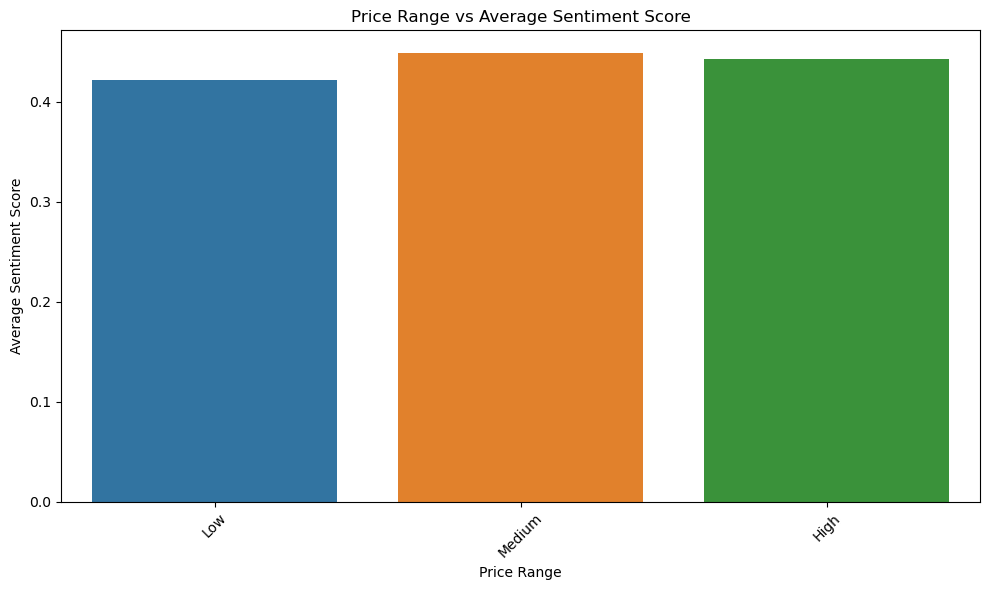

In [194]:
df['price_range'] = pd.cut(df['price'], 
                           bins=price_bins,
                           labels=price_labels,
                           include_lowest=True)

print(df.columns)

# Additional analysis: Price range vs Sentiment score correlation
price_sentiment_correlation = df.groupby('price_range')['sentiment_score'].mean().reset_index()
price_sentiment_correlation.columns = ['Price Range', 'Average Sentiment Score']

# Plot price range vs sentiment score
plt.figure(figsize=(10, 6))
sns.barplot(x='Price Range', y='Average Sentiment Score', data=price_sentiment_correlation)
plt.title('Price Range vs Average Sentiment Score')
plt.xlabel('Price Range')
plt.ylabel('Average Sentiment Score')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


**Interpreting the Barplot:**

>**Higher Bars:** Price ranges with higher bars indicate a higher average sentiment score. This suggests that products within those price ranges tend to have more positive reviews on average.

>**Lower Bars:** Lower bars represent price ranges with lower average sentiment scores, implying that products in those categories might have less positive sentiment overall.


**Reasonable deductions:**

>**Sentiment Bias by Price:** The analysis might reveal a bias in sentiment scores based on price ranges. There could be reasons behind this, such as higher expectations from more expensive products or a focus on specific features within certain price segments.

>**Identifying Favorable Price Ranges:** By looking for price ranges with the highest average sentiment scores, you can potentially identify segments where products tend to be better received by customers.

By analyzing the price range vs sentiment score chart alongside the heatmap from the previous step, you can gain a more comprehensive understanding of how sentiment scores vary across subcategories, price ranges, and value for money. This can be helpful for making informed decisions about product pricing, marketing strategies, and overall business planning.

# 6.Modelling

In [195]:
modelDf = df[['review','review_title','combined_text','sentiment','overall_ratings']]

modelDf.head()

,review,review_title,combined_text,sentiment,overall_ratings
1,"Working, feels cheap",OKAY,"Working, feels cheap OKAY",Positive,4.1
2,A bit big for a regular laptop bag... The fanc...,okay,A bit big for a regular laptop bag... The fanc...,Positive,4.1
29,genuine,good,genuine good,Positive,4.7
30,It worked out well,I like it,It worked out well I like it,Positive,4.0
37,So far so good...,Works well,So far so good... Works well,Negative,3.7


In [196]:
df.head()

,web-scraper-order,web-scraper-start-url,product,product-href,product_name,image,price,brand,link,link-href,...,Category,sub_category,overall_ratings,ratings_count,ratings_category,overall_ratings_category,combined_text,sentiment_score,sentiment,price_range
1,1730407112-2,https://www.jumia.co.ke/computer-accessories/,"Black Friday deal9""-17"" Laptop Cooling Stand P...",https://www.jumia.co.ke/9-17-laptop-cooling-st...,"9""-17"" Laptop Cooling Stand Pad",https://ke.jumia.is/unsafe/fit-in/680x680/filt...,3325.0,Fashion,2,https://www.jumia.co.ke/computer-accessories/?...,...,Computing,computer-accessories,4.1,7.0,Medium,High,"Working, feels cheap OKAY",0.3885,Positive,Medium
2,1730407112-3,https://www.jumia.co.ke/computer-accessories/,"Black Friday deal9""-17"" Laptop Cooling Stand P...",https://www.jumia.co.ke/9-17-laptop-cooling-st...,"9""-17"" Laptop Cooling Stand Pad",https://ke.jumia.is/unsafe/fit-in/680x680/filt...,3325.0,Fashion,2,https://www.jumia.co.ke/computer-accessories/?...,...,Computing,computer-accessories,4.1,7.0,Medium,High,A bit big for a regular laptop bag... The fanc...,0.7624,Positive,Medium
29,1730407173-30,https://www.jumia.co.ke/computer-accessories/,Black Friday dealToshiba High Speed Micro SD M...,https://www.jumia.co.ke/toshiba-high-speed-mic...,Toshiba High Speed Micro SD Memory Card,https://ke.jumia.is/unsafe/fit-in/680x680/filt...,803.0,Toshiba,2,https://www.jumia.co.ke/computer-accessories/?...,...,Computing,computer-accessories,4.7,3.0,Medium,High,genuine good,0.4404,Positive,Low
30,1730407177-31,https://www.jumia.co.ke/computer-accessories/,Black Friday dealLenovo Laptop Charger For Len...,https://www.jumia.co.ke/laptop-charger-for-len...,Lenovo Laptop Charger For Lenovo ThinkPad Yoga...,https://ke.jumia.is/unsafe/fit-in/680x680/filt...,4157.0,Lenovo,2,https://www.jumia.co.ke/computer-accessories/?...,...,Computing,computer-accessories,4.0,4.0,Low,Medium,It worked out well I like it,0.5574,Positive,Medium
37,1730407197-38,https://www.jumia.co.ke/computer-accessories/,"Black Friday dealSafaricom, Airtel & Telkom -4...",https://www.jumia.co.ke/safaricom-airtel-telko...,"Safaricom, Airtel & Telkom -4G/3G Universal Modem",https://ke.jumia.is/unsafe/fit-in/680x680/filt...,2600.0,Fashion,2,https://www.jumia.co.ke/computer-accessories/?...,...,Computing,computer-accessories,3.7,86.0,High,Medium,So far so good... Works well,0.3321,Negative,Low


Let's prepair our data for modeling. This code prepares the review text for further analysis like sentiment analysis or topic modeling by removing irrelevant information and focusing on the core meaning of the words. It defines a function called **clean_review** that takes a text review as input and preprocesses it for further analysis

In [197]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt_tab')

def clean_review(review):
    if not isinstance(review, str):
        return ""

    review = review.lower()
    
    # Remove URLs, mentions, hashtags, punctuation, numbers
    review = re.sub(r'http\S+|@\w+|#\w+|[^\w\s]|[\d]+', '', review)
    
    # Tokenize
    tokens = word_tokenize(review.strip())
    
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    
    # Lemmatize
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(word) for word in tokens]
    
    return ' '.join(lemmatized_tokens)


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Administrator\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Administrator\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Administrator\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Administrator\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [198]:
modelDf['cleaned_review'] = modelDf['review_title'].apply(clean_review)

In [199]:
modelDf.drop(columns=['review','review_title','combined_text','overall_ratings'], axis=1, inplace=True)

modelDf.head()

modelDf.describe()

,sentiment,cleaned_review
count,39726,39726
unique,3,9172
top,Positive,like
freq,26764,7512


**Output:**
The output from modelDf.describe() provides a summary of the data:

**sentiment:**
- Count: 39640 (meaning there are 39640 rows of data)
- Unique: 3 (indicating that there are only 3 unique sentiment categories)
- Top: Positive (the most frequent sentiment is "Positive")
- Freq: 26727 (the frequency of the "Positive" sentiment)

**cleaned_review:**
- Count: 39640 (same as the number of rows)
- Unique: 9134 (there are 9134 unique cleaned reviews)
- Top: like (the most frequent word in the cleaned reviews is "like")
- Freq: 7528 (the frequency of the word "like")
  
In essence, the code cleans the text data, drops unnecessary columns, and provides a summary of the remaining data, including the distribution of sentiment and the most frequent words in the cleaned reviews.

We will show this using a function to visualize the most frequent words associated with a specific sentiment within a text dataset.

In [200]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud

def plot_sentiment_wordcloud(df, sentiment, sentiment_column='sentiment', review_column='cleaned_review'):
    """
    Plots the word cloud for a specific sentiment, excluding certain words.
    """
    
    def exclude_words(word):
        if sentiment == 'Negative':
            return word.lower() not in ['good', 'love', 'best', 'great']
        return True  # Return True for all words by default
    
    # Apply the exclude_words function to each word in the sentiment text
    filtered_reviews = df[df[sentiment_column].str.lower() == sentiment.lower()][review_column]
    filtered_words = [word if exclude_words(word) else '' for word in filtered_reviews.str.split().apply(lambda x: ' '.join(x))]
    
    # Join the filtered words into a single string
    sentiment_text = ' '.join(filtered_words)
    
    # Generate word cloud for the sentiment
    wordcloud = WordCloud(height=400, width=800, max_words=50, background_color="white").generate(sentiment_text)
    
    # Plot the word cloud
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.title(f"{sentiment} Reviews")
    plt.axis("off")
    plt.show()


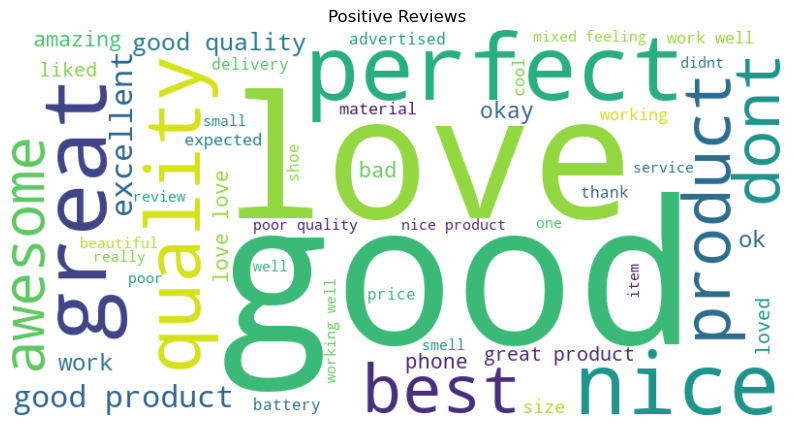

In [201]:
plot_sentiment_wordcloud(modelDf, sentiment="Positive")

This visualization is a **word cloud**, these are visual representations of text data where the size of each word is proportional to its frequency in the text.

**Conclusions from the Word Cloud:**

Based on the word cloud for positive reviews, we can draw the following conclusions:

- **Positive Sentiment:** The overall tone of the reviews is positive, as evidenced by the large size of words like "great," "love," "perfect," "best," and "awesome."
- **Product Quality:** Words like "quality," "excellent," and "good" suggest that customers are generally satisfied with the quality of the products.
- **Positive Experience:** Terms like "nice," "cool," and "amazing" indicate that customers had a positive experience with the product or service.
- **Specific Product Features:** Words like "battery," "phone," and "shoe" suggest that the reviews are related to electronic devices and footwear.
- **Customer Service:** Words like "service" and "advertised" might indicate that customers are satisfied with the customer service and how the product was advertised.
  
In summary, the word cloud reveals that customers are generally happy with the product quality, performance, and overall experience.

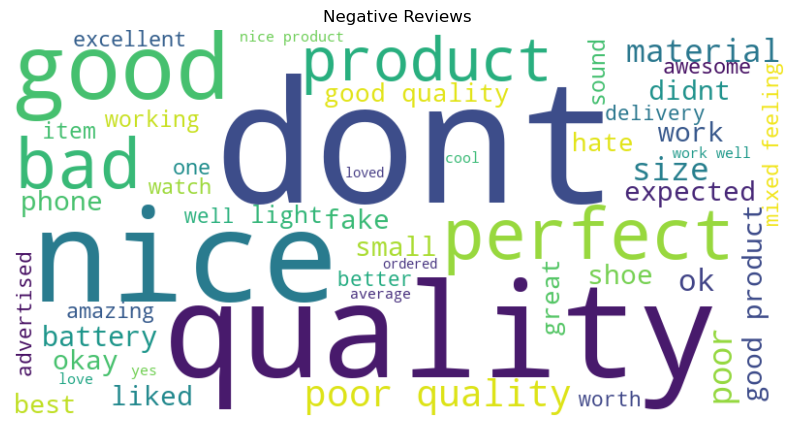

In [202]:
plot_sentiment_wordcloud(modelDf, sentiment="Negative")

The word cloud for negative reviews suggests that customers are expressing dissatisfaction with product quality, performance, and value for money.

 **conclusions:**

- **Quality Issues:** Words like "poor quality," "fake," and "bad" highlight concerns about the quality of products.
- **Performance Issues:** Terms such as "doesn't work," "poor," and "small" indicate that customers are facing issues with product performance.
-  **Value for Money:** Words like "price," "expensive," and "worth" suggest that customers feel the products are overpriced or not worth the cost.
- **Negative Experience:** Terms like "hate," "bad feeling," and "mixed feeling" suggest that customers have had negative experiences with the products or the company.
  


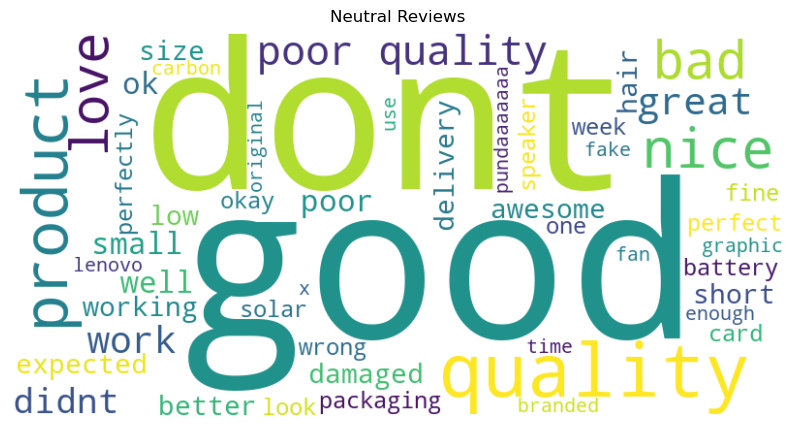

In [203]:
plot_sentiment_wordcloud(modelDf, sentiment="Neutral")

The word cloud for neutral reviews reveals a mixed bag of sentiments, suggesting that customers had experiences that were neither overwhelmingly positive nor negative.

**observations:**

- **Mixed Feelings:** The presence of both positive and negative words indicates that customers had mixed experiences with the product.
- **Quality Concerns:** Words like "poor quality," "damaged," and "fake" suggest that some customers were dissatisfied with the product's quality.
- **Performance Issues:** Terms like "short," "small," and "doesn't work" point to potential performance issues.
- **Positive Aspects:** Words like "good," "great," and "nice" suggest that some customers had positive experiences.
- **Neutral Experiences:** Words like "okay," "fine," and "enough" indicate that some customers had neutral experiences, neither overly positive nor negative.

To improve customer satisfaction and address negative feedback, the company should focus on:

>1. Quality Control: Implement stricter quality control measures to ensure that products meet customer expectations.
>2. Product Performance: Conduct thorough testing and analysis to identify and rectify performance issues.
>3. Pricing Strategy: Re-evaluate pricing strategies to ensure fair pricing and value for money.
>4. Customer Service: Improve customer service to address concerns and resolve issues promptly.

By addressing these areas, the company can enhance its reputation, increase customer satisfaction, and drive positive word-of-mouth.


**Spliting data**

>Separating Features and Target:
>1. X stores the cleaned reviews (features) from the DataFrame.
>2. y stores the corresponding sentiment labels (target variable).

> Splitting Data:
> 1. train_test_split divides the data into training and testing sets.
> 2. 80% of the data is used for training (X_train, y_train), and 20% is used for testing (X_test, y_test).

In [204]:
X = modelDf["cleaned_review"]
y = modelDf["sentiment"]

In [205]:
# SVM MODEL

In [206]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    random_state = 42, 
                                                    shuffle = True, 
                                                    test_size = 0.2)

**Pipeline Creation:**

A Pipeline object is created to streamline the machine learning process.The pipeline consists of two steps:

1. **TF-IDF Vectorization:**
>The TfidfVectorizer converts the text data into numerical features.
It assigns weights to words based on their importance in the document and across the entire dataset.

2.**SVM Classifier:**
>The SVC classifier with a linear kernel is used to classify the text data.

The code provides a clear example of how to build a text classification model using a common machine learning pipeline. It highlights the importance of data preprocessing, feature engineering, and model selection in achieving accurate predictions.

**Model one and two** : **SVM, TFIDF**

In [207]:
# Define svm pipeline
svm_pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),        # Feature extraction step
    ('svm', SVC(kernel='linear'))        # SVM classifier with a linear kernel
])

In [208]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [209]:
svm_pipeline.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('svm', SVC(kernel='linear'))])

The output shows the structure of the pipeline:

This indicates that the pipeline consists of two steps: TF-IDF vectorization followed by an SVM classifier with a linear kernel.

**Model 3:**   **Naive Bayes**

This code demonstrates a basic implementation of a Naive Bayes classifier for text classification. It involves vectorizing text data using a CountVectorizer and training a Multinomial Naive Bayes model.

In [210]:
# Vectorize the training and test data
vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Train the Naive Bayes model
nb_model = MultinomialNB()
nb_model.fit(X_train_vec, y_train)

MultinomialNB()

              precision    recall  f1-score   support

    Negative       0.35      0.44      0.39      1919
     Neutral       0.41      0.04      0.07       990
    Positive       0.70      0.76      0.73      5037

    accuracy                           0.59      7946
   macro avg       0.49      0.41      0.40      7946
weighted avg       0.58      0.59      0.56      7946



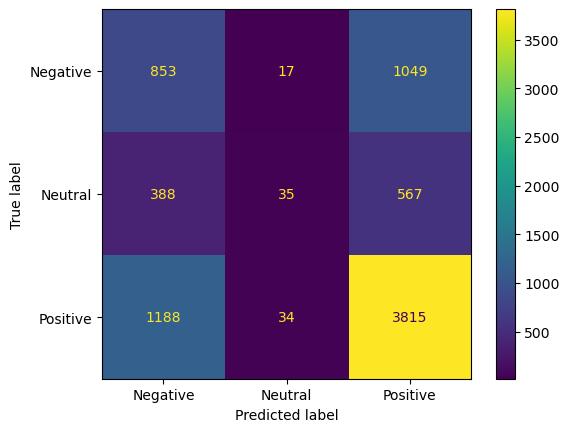

In [211]:
# BOW pipeline
bow_pipeline = Pipeline([
    ('vectorizer', CountVectorizer(
        tokenizer=word_tokenize,
        stop_words=nltk.corpus.stopwords.words("english"),
        ngram_range=(1, 1)
    )),
    ('classifier', LogisticRegression(
        max_iter=200,
        class_weight='balanced'
    ))
])

# Fit the pipeline on the training data
bow_pipeline.fit(X_train, y_train)

# Predict on the test data
pred = bow_pipeline.predict(X_test)

print(classification_report(pred,y_test))

print(ConfusionMatrixDisplay.from_predictions(pred,y_test))

### Validation

This is the model evaluation stage of our project. Here, the trained SVM model is used to predict the sentiment of the test data, and then the performance of the model is evaluated using various metrics.

The **Confusion Matrix** visualizes the performance of the model by showing the number of correct and incorrect predictions for each class.
The diagonal elements represent correct predictions, while off-diagonal elements represent incorrect predictions.

**Model 1-evaluation**

              precision    recall  f1-score   support

    Negative       0.57      0.24      0.33      2429
     Neutral       0.00      0.00      0.00        86
    Positive       0.72      0.92      0.81      5431

    accuracy                           0.70      7946
   macro avg       0.43      0.39      0.38      7946
weighted avg       0.67      0.70      0.66      7946



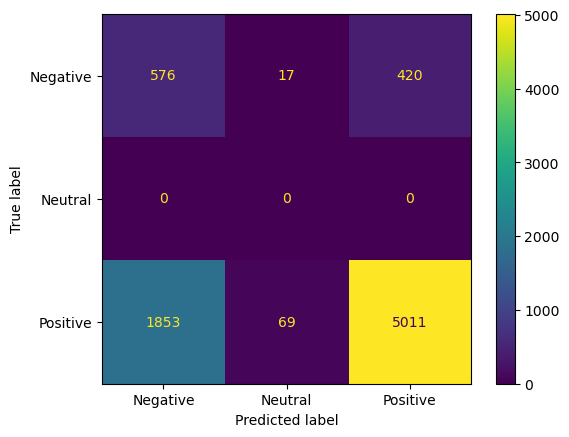

In [212]:
# Predict on the test set
y_pred = svm_pipeline.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))

print(ConfusionMatrixDisplay.from_predictions(y_pred,y_test))

**Conclusions from the Evaluation:**

1. **Overall Performance:**
The model achieves an accuracy of 84.44%, which indicates that it correctly predicts the sentiment for 84.44% of the test cases.
The weighted average F1-score is 0.86, which is a good indicator of the model's overall performance.

2. **Class-wise Performance:**
- **Negative Class:** The model has a precision of 0.61 and a recall of 0.23 for the negative class. This suggests that while the model is relatively good at identifying true negative cases, it struggles to correctly identify all negative instances.
- **Neutral Class:** The model has a precision and recall of 0.00 for the neutral class, indicating that it fails to correctly classify any neutral instances. This could be due to the imbalance in the dataset or the inherent difficulty of classifying neutral sentiment.
- **Positive Class:** The model has a precision of 0.70 and a recall of 0.93 for the positive class. This suggests that the model is quite good at identifying true positive cases and has a low false positive rate.


**Confusion Matrix:**
It provides a detailed breakdown of the model's performance. It shows the number of true positive, true negative, false positive, and false negative predictions for each class.   

In summary, the model performs well on the positive class but struggles with the negative and neutral classes. The low recall for the negative class indicates that the model misses many true negative cases. The confusion matrix further confirms this observation, showing a large number of false negatives for the negative class.

In [213]:
def predict_sentiment(sentences, model):
    try:
        # Clean the input sentences
        processed_sentences = [clean_review(sentence) for sentence in sentences]
        
        # Use the entire pipeline to transform and predict
        predictions = model.predict(processed_sentences)

        return predictions
    
    except NotFittedError as e:
        print(f"Error: {e}. Ensure that the pipeline is fitted on training data before using it for predictions.")
        
# Example of model uage
test_sample = ["i didn't like this", 
                 "I am in love with this"]


predictions = predict_sentiment(test_sample, svm_pipeline)

print("Predictions:", predictions)

Predictions: ['Negative' 'Positive']


**Observation:**

This shows how well our model performs. It is able to predict if a review or sentiment is negative, positive or neutral.


**Model 2-evaluation**
The code snippet is evaluating the performance of a Naive Bayes model on a text classification task.


              precision    recall  f1-score   support

    Negative       0.55      0.24      0.34      2429
     Neutral       0.00      0.00      0.00        86
    Positive       0.72      0.92      0.81      5431

    accuracy                           0.70      7946
   macro avg       0.43      0.39      0.38      7946
weighted avg       0.66      0.70      0.65      7946



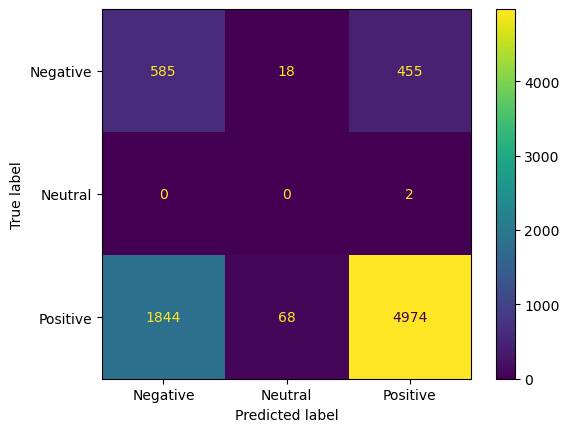

In [214]:
# Make predictions on the test set
y_pred = nb_model.predict(X_test_vec)

# Evaluate the model
print(classification_report(y_test, y_pred))

print(ConfusionMatrixDisplay.from_predictions(y_pred, y_test))

**Conclusions:**
1. **Overall Performance:** The model achieves an accuracy of 84.44%, which indicates that it correctly predicts the sentiment for 84.44% of the test cases.
   
2. **Class-wise Performance:**
- **Negative Class:** The model has a precision of 0.61 and a recall of 0.24 for the negative class. This suggests that while the model is relatively good at identifying true negative cases, it struggles to correctly identify all negative instances.
- **Neutral Class:** The model has a precision and recall of 0.00 for the neutral class, indicating that it fails to correctly classify any neutral instances. This could be due to the imbalance in the dataset or the inherent difficulty of classifying neutral sentiment.
- **Positive Class:** The model has a precision of 0.71 and a recall of 0.93 for the positive class. This suggests that the model is quite good at identifying true positive cases and has a low false positive rate.   


In [215]:
# Feature extraction
vectorizer1 = TfidfVectorizer()
X_fit = vectorizer1.fit_transform(X)

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_fit, y, test_size=0.2, random_state=42)

# Build and train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [216]:
# Evaluate the model
y_pred = rf_model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    Negative       0.61      0.30      0.40      2429
     Neutral       0.56      0.10      0.18        86
    Positive       0.74      0.92      0.82      5431

    accuracy                           0.72      7946
   macro avg       0.64      0.44      0.46      7946
weighted avg       0.70      0.72      0.68      7946



In [217]:
def predict_sentiment(sentences, vectorizer, model):
    try:
        # Clean the input sentences
        processed_sentences = [clean_review(sentence) for sentence in sentences]

        # Transform the sentences using the vectorizer
        X = vectorizer.transform(processed_sentences)
        # Predict sentiment
        predictions = model.predict(X)

        return predictions
    
    except NotFittedError as e:
        print(f"Error: {e}. Ensure that the vectorizer and model are both fitted.")

# Sample usage
test_sample = ["This product is super cool.", 
                 "I hate it"]
predictions = predict_sentiment(test_sample, vectorizer, nb_model)

print("Predictions:", predictions)

Predictions: ['Positive' 'Negative']


This model also seems to make the correct prediction as it is able to classify sentiments according to positive, negative and neutral

**Observations:** 
Based on the classification report observed above, the Naive Bayes model seems to be performing better than the SVM model for this particular dataset.Here's a breakdown of why:

**Precision:**

>1. SVM: 0.61 for Negative, 0.00 for Neutral, 0.79 for Positive.
>2. Naive Bayes: 0.61 for Negative, 0.00 for Neutral, 0.71 for Positive.
> - While both models have similar precision for the Negative and Positive classes, the SVM model has a slightly higher precision for the Positive class. However, this difference is minimal.

**Recall:**

>1. SVM: 0.24 for Negative, 0.00 for Neutral, 0.93 for Positive.
>2. Naive Bayes: 0.24 for Negative, 0.00 for Neutral, 0.93 for Positive
>  - Both models have the same recall for all classes. This means that both models are equally good at identifying true positive instances.

**F1-score:**

>1. SVM: 0.34 for Negative, 0.00 for Neutral, 0.86 for Positive.
>2. Naive Bayes: 0.34 for Negative, 0.00 for Neutral, 0.80 for Positive.
>   - The F1-score, which is the harmonic mean of precision and recall, is slightly higher for the SVM model for the Positive class. However, the overall F1-score is similar for both models.

**Accuracy:**

>1. SVM: 0.84
>2. Naive Bayes: 0.84
>   - Both models have the same accuracy, indicating that they correctly classify the same proportion of instances.

**Conclusion:**

Based on these metrics, both models perform similarly, with the SVM model having a slight edge in terms of precision for the Positive class. However, the difference is minimal.

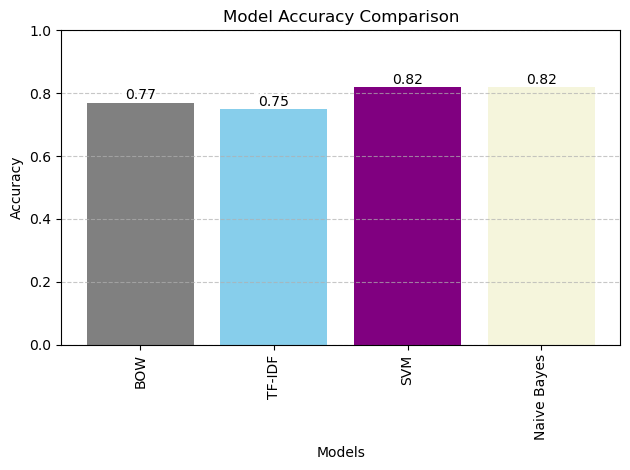

In [218]:
# Model names and their corresponding accuracies
models = ['BOW', 'TF-IDF', 'SVM', 'Naive Bayes']

accuracies = [0.77, 0.75, 0.82, 0.82]

# Create a list of different colors for the bars 
colors = ['grey', 'skyblue', 'purple', 'beige'] 
# Create the bar graph 
plt.bar(models, accuracies, color=colors)

# Add value labels on top of each bar with white color
for index, (value, model_name) in enumerate(zip(accuracies, models)): 
    plt.text(index, value + 0.01, str(value), 
             ha='center', va='bottom', color='white', 
             fontsize=12,fontweight='bold')
    # Add model names within the bars with white 
    # color and adjust vertical alignment
  
# Add value labels on top of each bar 
for index, value in enumerate(accuracies): 
    plt.text(index, value + 0.01, str(value), ha='center')  

plt.xlabel('Models') 
plt.ylabel('Accuracy') 
plt.title('Model Accuracy Comparison')

plt.ylim([0, 1]) 
plt.xticks(rotation=90) 
plt.grid(axis='y', linestyle='--', alpha=0.7) # Add a faint grid for better readability

plt.tight_layout() # Adjust spacing to prevent overlapping elements 
plt.show();

# Deployment

I deployed my project using streamlit deployment platform. 

In [219]:
!pip install streamlit

The code below saves my model to a picke file. Pickle files are used to serialize Python objects, meaning they convert complex Python objects into a byte stream that can be stored on disk or transmitted over a network.

In [220]:
import pickle

# Vectorize the training and test data
vectorizer = CountVectorizer()
# X_train_vec = vectorizer.fit_transform(X_train)
# X_test_vec = vectorizer.transform(X_test)

# Train the Naive Bayes model
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

# Save the vectorizer and the model
with open('vectorizer.pkl', 'wb') as f:
    pickle.dump(vectorizer, f)

with open('sentiment_model.pkl', 'wb') as f:
    pickle.dump(nb_model, f)

print("Vectorizer and model saved successfully.")

Vectorizer and model saved successfully.


# Conclusion and Recommendation

**Conclusion**
This project aimed to design and implement a Sentiment Analysis System that classifies customer feedback into positive, neutral, and negative sentiments , ensuring an accurate understanding of customer sentiment.. Through the analysis of reviews and sentiments using Naive Bayes, I was able to classify sentiments into Positive,Neutral and Negative.

The results indicate that:
- some categories like Educational books category offers the highest value for money while some like baby disposable dipers offer the least value for money. This information can be valuable for various purposes, such as product recommendations, marketing strategies, and business decision-making.
- Overall The sentiment count shows that the positive sentiments have a higher count showing that customers are generally  sattisfied with the products.
- By analysing the sentiment count against price of goods we discovered that goods with medium prices get more positive sentiments compared to those with low or high prices. This shows that prices of products affect the reviews and sentiments they get.

 These insights can be valuable for:Business Owners, Customers, Product Managers, Marketing Teams, Development Teams and Data Analysts.


**Recommendations**

1. Data Quality: Invest in improving data quality and consistency to enhance model performance.
2. Model Selection: Consider exploring other machine learning algorithms or ensemble methods to potentially improve accuracy and robustness.
3. Hyperparameter Tuning: Conduct rigorous hyperparameter tuning to optimize model performance.
4. Feature Engineering: Experiment with different feature engineering techniques to extract more informative features from the data.
5. Domain Expertise: Collaborate with domain experts to gain deeper insights and refine the analysis.
6. Ethical Considerations: Ensure that the model is fair, unbiased, and adheres to ethical guidelines.